<a href="https://colab.research.google.com/github/Tagore-7/Pytorch_Tutorial/blob/main/Simple_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# create a model class that inherits the nn.Module
class Model(nn.Module):
  # Input layer( 4 features of the flower )
  # --> Hidden Layer 1( number of neurons)
  # --> H2()
  # -> output layer(3 classes of the iris flower)
  def __init__(self, in_features = 4, h1 = 8, h2 = 9, out_features = 3):
    super().__init__() # instantiate the nn.module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [3]:
# pick a random nunber for random seed
torch.manual_seed(123)
# create an instance of model
model = Model()


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [5]:
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
my_df = pd.read_csv(url)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [6]:
# change the target into int
my_df['variety'] = my_df['variety'].replace('Setosa',0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor',1.0)
my_df['variety'] = my_df['variety'].replace('Virginica',2.0)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [7]:
# Train test split into X and y
X = my_df.drop('variety', axis = 1)
y = my_df['variety']

In [8]:
# convert them into nunpy arrays
X = X.values
y = y.values


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=123)


In [11]:
# convert x features into float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [12]:
# convert y labels into long tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [13]:
# set the criterion of model to measure the error
criterion = nn.CrossEntropyLoss()
# set the optimizer, lr = learning rate
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)


In [14]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [15]:
# train our model
# epochs
epochs = 150
losses = []
for i in range(epochs):
  # go forward and get a prediction
  y_pred = model.forward(X_train) # get preidcted result

  # Measure the loss
  loss = criterion(y_pred, y_train)

  # keep track of losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f" Epoch:{i} and loss:{loss}")

  # Do back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



 Epoch:0 and loss:1.3198721408843994
 Epoch:10 and loss:1.0724208354949951
 Epoch:20 and loss:1.0104104280471802
 Epoch:30 and loss:0.9114257097244263
 Epoch:40 and loss:0.7613361477851868
 Epoch:50 and loss:0.598755955696106
 Epoch:60 and loss:0.4838220775127411
 Epoch:70 and loss:0.39621835947036743
 Epoch:80 and loss:0.31039702892303467
 Epoch:90 and loss:0.22576352953910828
 Epoch:100 and loss:0.15592458844184875
 Epoch:110 and loss:0.11028684675693512
 Epoch:120 and loss:0.0843057632446289
 Epoch:130 and loss:0.06984181702136993
 Epoch:140 and loss:0.06121839955449104


Text(0.5, 0, 'Epoch')

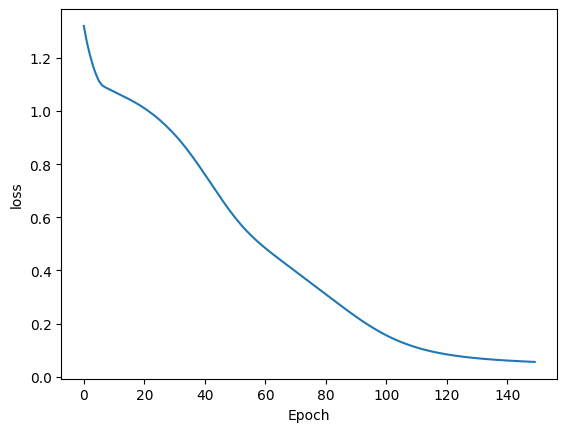

In [16]:
plt.plot(range(epochs),losses)
plt.ylabel("loss")
plt.xlabel("Epoch")

In [17]:
# evaluate the model on X_test
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)


In [18]:
loss

tensor(0.1225)

In [20]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = "Versicolor"
    else:
      x = "Virginica"

    print(f"{i + 1},) {str(y_val)} \t {x} \t {y_val.argmax().item()}")

    if y_val.argmax().item() == y_test[i]:
      correct += 1
print(f"we got {correct} correct")

1,) tensor([-6.3093,  2.6818,  3.2000]) 	 Versicolor 	 2
2,) tensor([-8.9012,  2.1644,  6.0226]) 	 Virginica 	 2
3,) tensor([-9.5319,  1.6118,  7.0668]) 	 Virginica 	 2
4,) tensor([-1.4292,  3.9816, -2.3350]) 	 Versicolor 	 1
5,) tensor([ 13.6764,   7.6523, -18.0571]) 	 Setosa 	 0
6,) tensor([-5.7100,  2.7900,  2.5558]) 	 Virginica 	 1
7,) tensor([-4.3871,  3.2724,  0.9551]) 	 Versicolor 	 1
8,) tensor([ 12.4311,   6.9594, -16.4787]) 	 Setosa 	 0
9,) tensor([ 11.6682,   6.6767, -15.6143]) 	 Setosa 	 0
10,) tensor([-3.4894,  3.2113,  0.1537]) 	 Versicolor 	 1
11,) tensor([-7.9105,  2.5323,  4.8189]) 	 Virginica 	 2
12,) tensor([ 15.1642,   8.4800, -19.9428]) 	 Setosa 	 0
13,) tensor([-2.4066,  3.3961, -1.0025]) 	 Versicolor 	 1
14,) tensor([-7.8590,  2.3712,  4.8885]) 	 Virginica 	 2
15,) tensor([-10.8496,   1.9671,   8.0211]) 	 Virginica 	 2
16,) tensor([-9.6711,  1.6782,  7.1423]) 	 Virginica 	 2
17,) tensor([ 14.4668,   8.0920, -19.0589]) 	 Setosa 	 0
18,) tensor([ 12.2434,   6.8550,

In [21]:
new_iris = torch.tensor([4.7,3.2,1.3,0.2])

In [22]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 12.8992,   7.2198, -17.0721])


In [24]:
newer_iris = torch.tensor([5.9,3.0,5.1,1.8])
with torch.no_grad():
  print(model(newer_iris))

tensor([-6.8366,  2.3781,  3.9197])


In [25]:
# save model
torch.save(model.state_dict(), "my_iris_model.pt")

In [26]:
# load the saved model
new_model = Model()
new_model.load_state_dict(torch.load("my_iris_model.pt"))

<All keys matched successfully>

In [27]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)